In [1]:
from fluid_experiment.fluid_experiment import FluidExperiment
import os
from mutate.fuse import fuse_track_output

path_experiment = "/Users/lukasv/DATA/midap/FluidPhage_REP1_results"
color_channels = ["CFP","YFP"]


exp = FluidExperiment(path_experiment, color_channels= color_channels, name="FluidPhage")

print(exp)

exp.create_metdata_template()
exp.load_metadata_template()


exp2 = FluidExperiment.from_copy(exp)

exp2.drop_positions(positions= exp2.positions[3:])
print(exp2)

exp2.filter_data(column="trackID", min_occurences= 5)

#exp2.calculate_growth_rate(5,id_column="trackID", value_column= "major_axis_length")

#exp2.calculate_local_neighborhood(50)

exp2.save()


Loading sample at position pos1 for group CFP
Loading sample at position pos1 for group YFP
Loading sample at position pos2 for group CFP
Loading sample at position pos2 for group YFP
Loading sample at position pos3 for group CFP
Loading sample at position pos3 for group YFP
Loading sample at position pos4 for group CFP
Loading sample at position pos4 for group YFP
Loading sample at position pos5 for group CFP
Loading sample at position pos5 for group YFP
Loading sample at position pos6 for group CFP
Loading sample at position pos6 for group YFP
Loading sample at position pos7 for group CFP
Loading sample at position pos7 for group YFP
Loading sample at position pos8 for group CFP
Loading sample at position pos8 for group YFP
Loading sample at position pos9 for group CFP
Loading sample at position pos9 for group YFP
Loading sample at position pos10 for group CFP
Loading sample at position pos10 for group YFP
Loading sample at position pos11 for group CFP
Loading sample at position pos1

Successfully loaded experiment with data from 3 positions and 2 color channels
Filtering out frame with less than 0 occurences
Filtering out frame with min value 0 and max value 20
Filtering channel CFP at position pos1:
Filtering channel YFP at position pos1:
Filtering channel CFP at position pos2:
Filtering channel YFP at position pos2:
Filtering channel CFP at position pos3:
Filtering channel YFP at position pos3:
FluidExperiment with path: /Users/lukasv/DATA/midap/FluidPhage_REP1_results
3 positions: pos1, pos2, pos3
2 color channels: CFP, YFP
length of experiment is consistent: 20
experiment has consistent headers: Unnamed: 0, area, edges_max_col, edges_max_row, edges_min_col, edges_min_row, first_frame, frame, globalID, intensity_max, intensity_mean, intensity_min, labelID, last_frame, lineageID, major_axis_length, minor_axis_length, split, trackID, trackID_d1, trackID_d2, trackID_mother, x, y
Experiment has metadata:
          device_channel       experiment   group position
pos

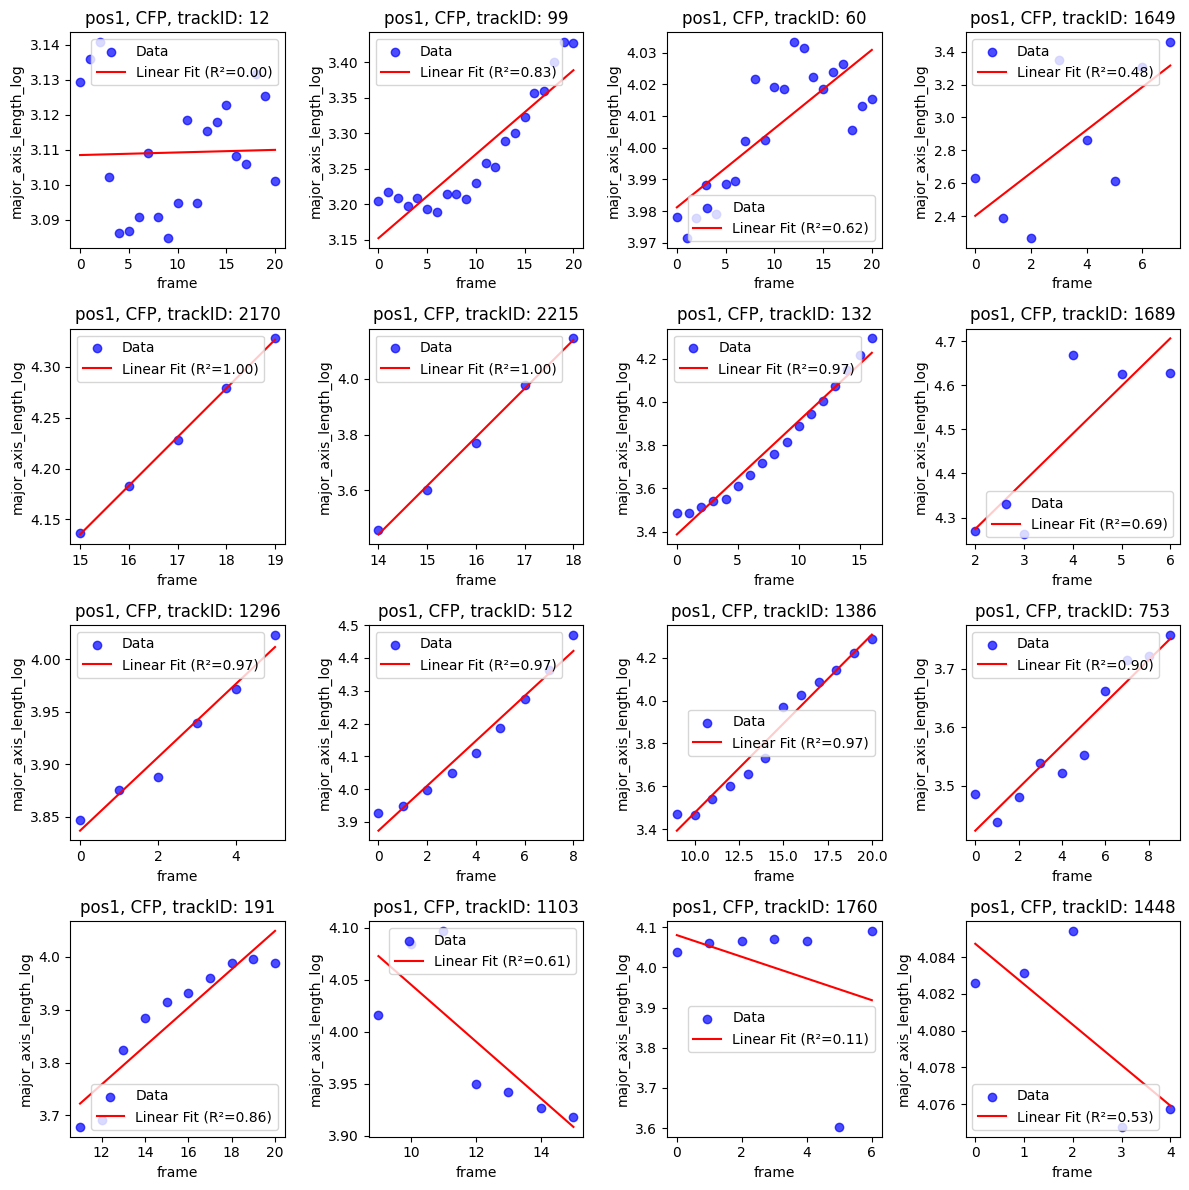

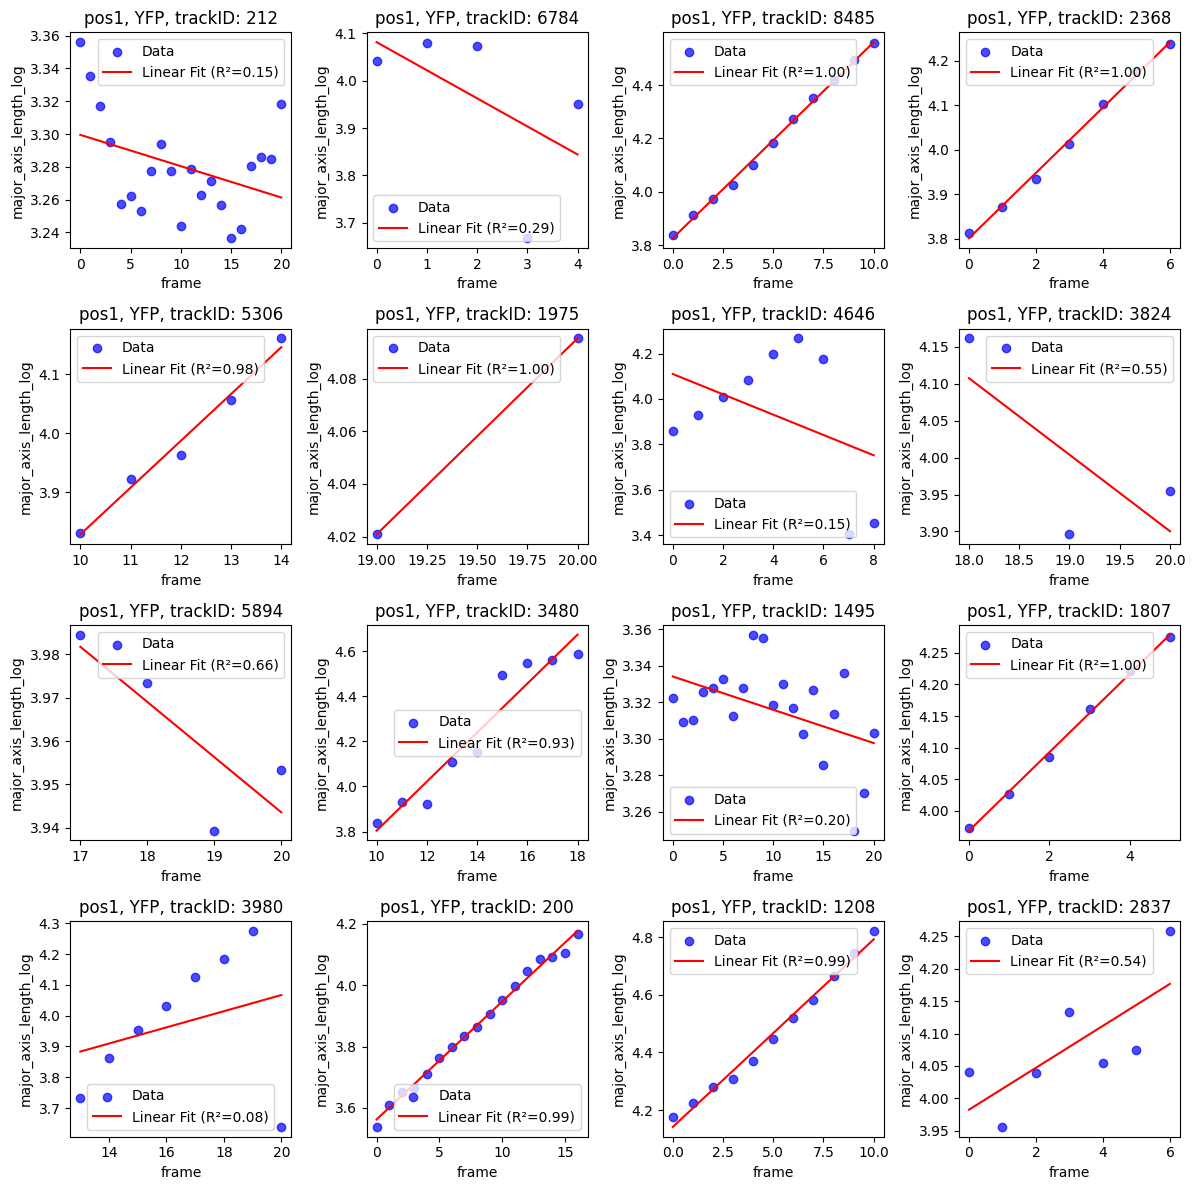

In [5]:
import numpy as np

num = int(np.random.random() * 10000)
exp3 = FluidExperiment.load(os.path.join(path_experiment,exp2.name + ".h5"))

exp3.filter_data("frame",min_value=0, max_value=20)
print(exp3)

exp3.add_transform_data(column="major_axis_length")
exp3.plot_qc("major_axis_length_log", n_samples=16, positions= "pos1")